# Automatidata -  Exploratory Data Analysis

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

**Part 1:** Ethical considerations

**Part 2:** Feature engineering

**Part 3:** Modeling

This project aims to conduct exploratory data analysis (EDA) and visualization for the New York City Taxi and Limousine Commission (TLC) dataset. The analysis includes data structuring, cleaning, and visualization using Python and Tableau to understand taxi ridership patterns.

Data Structuring and Cleaning

The dataset was loaded into Python, and data structuring and cleaning tasks were performed. This involved handling missing values, converting data types, and ensuring data consistency.

Exploratory Data Analysis (EDA)

EDA was conducted using matplotlib and seaborn libraries in Python. Key visualizations include box plots of ride durations and time series plots showing taxi rides breakdown by quarter or month. These visualizations provide insights into ride duration distributions and temporal patterns in taxi ridership.

Tableau Visualizations

Tableau was utilized to create interactive and accessible visualizations for the New York City TLC dataset. A Tableau dashboard was designed to display a map of taxi/limo trips by month, catering to both data-savvy individuals and those with visual impairments.


# Visualize a story in Tableau and Python


# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan]
   *        [Analyze]
   *        [Construct]
   *        [Execute]

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable :

## Identify any outliers:

*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
  * Use histograms to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

      * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
      * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.


### Task 1. Imports, links, and loading

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 

Consider these questions in your PACE Strategy Document to reflect on the Analyze stage.

Consider functions that understand and structure the data. 

*    `head()`
*    `describe()`
*    `info()`
*    `groupby()`
*    `sortby()`

  Start by discovering, using head and size. 

In [3]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.size

385883

In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

There is no missing data according to the results from the `info()` function. 

###  Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map

A bar chart, box plot and scatter plot will be most helpful in your understanding of this data. 

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 

Consider these questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization

It’s time to plot your visualization(s)!

## Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

In [7]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

### **trip_distance**

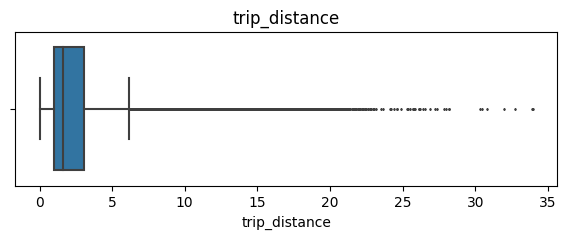

In [8]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);


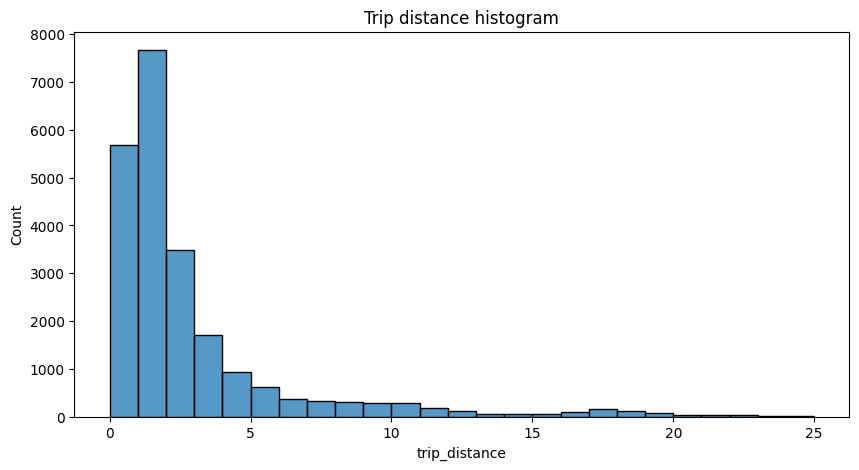

In [9]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

**Note:**<br>
The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

### **total_amount**

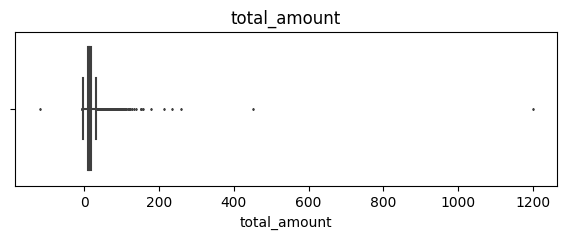

In [10]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

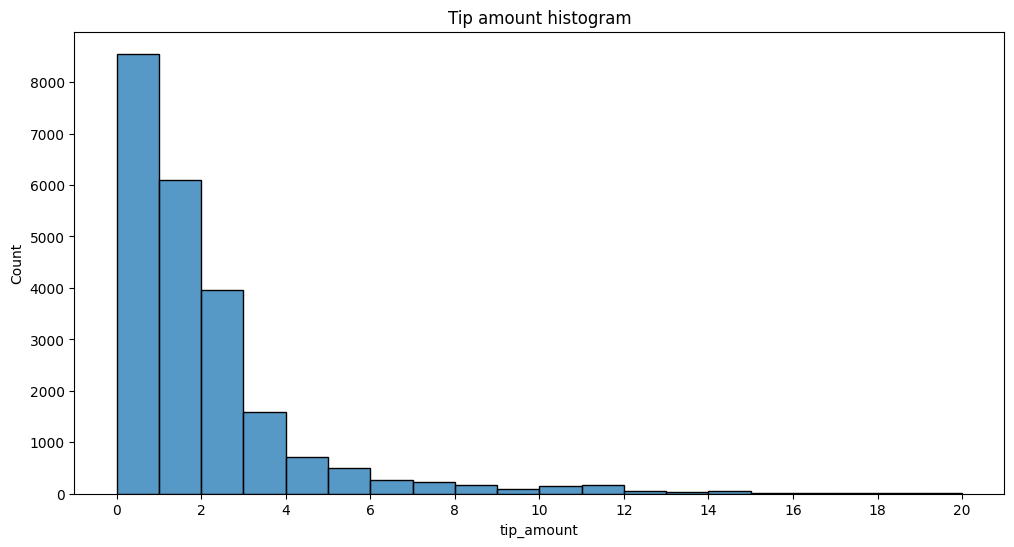

In [11]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

**Note:**<br>
The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

### **tip_amount by vendor**

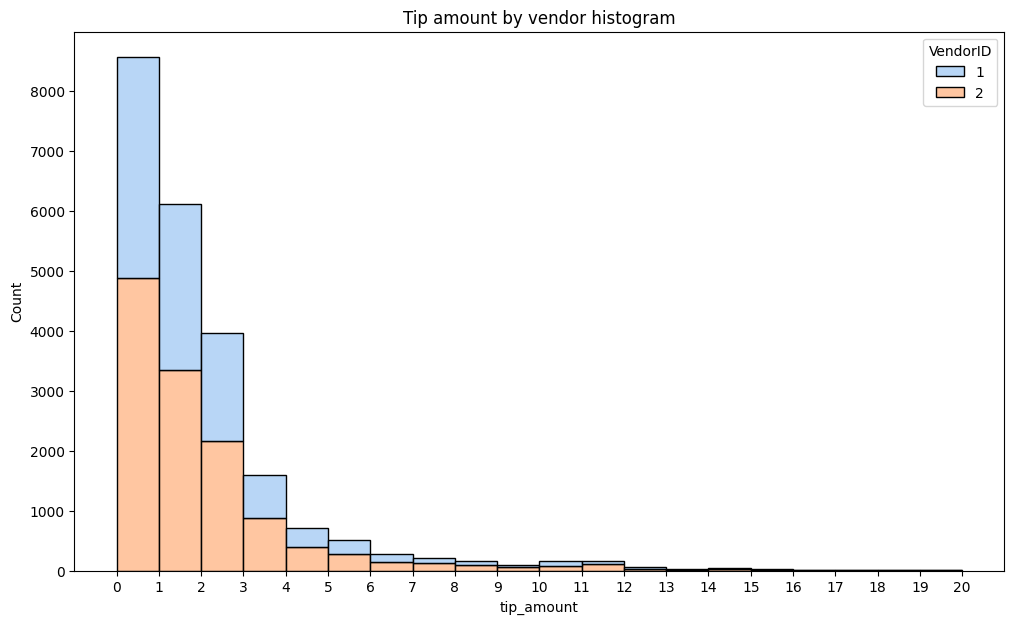

In [12]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

**Note:**<br>
Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

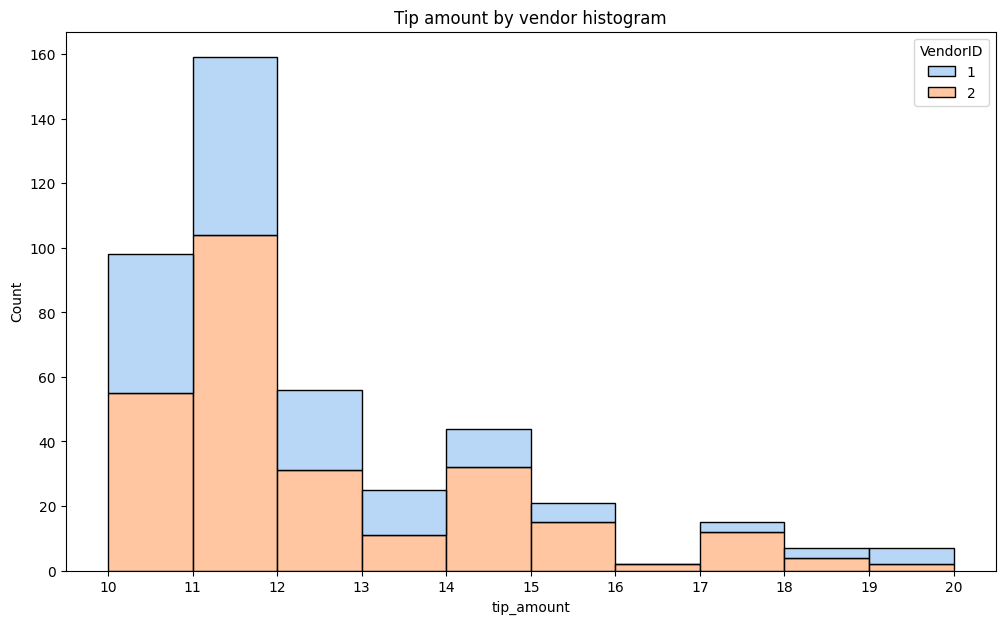

In [13]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

**Note:**<br>
 The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

### **Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [14]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Note:**<br>
Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

### **Create month and day columns**

In [15]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

### **Plot total ride count by month**

Begin by calculating total ride count by month.

In [16]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

**Note:** The months are out of order.

Reorder the results to put the months in calendar order.

In [17]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [18]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

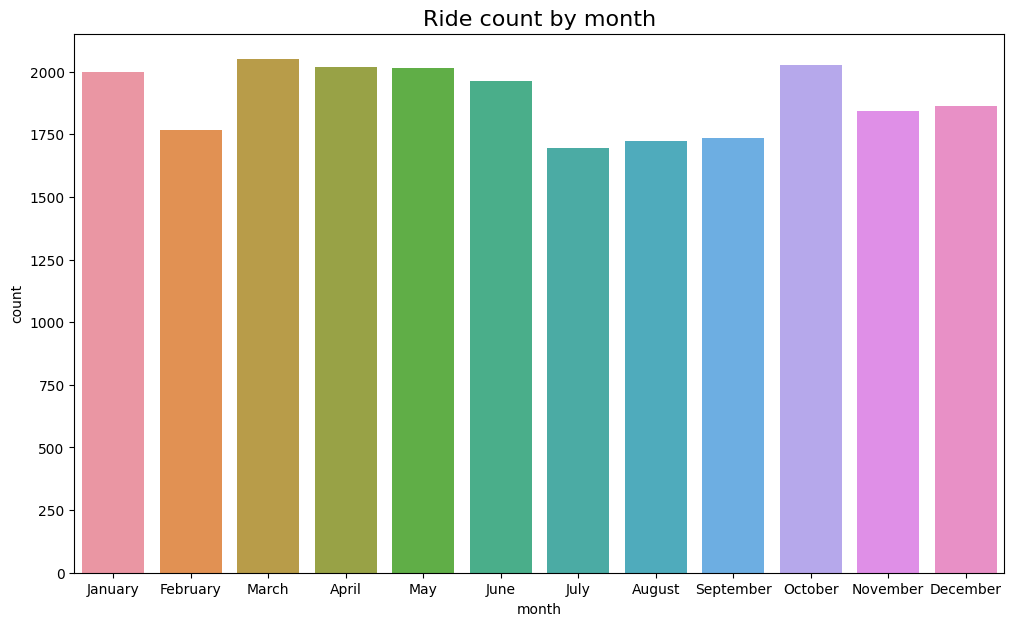

In [19]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

**Note:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [20]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

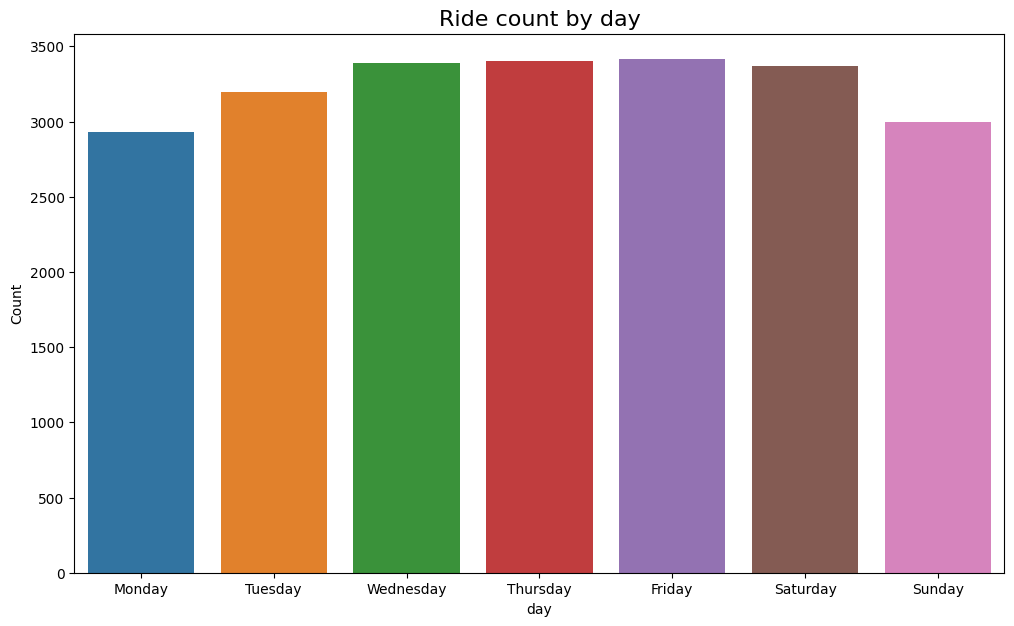

In [21]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

**Note:** Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [22]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the sum of numeric columns by day
total_amount_day = df.groupby('day')[numeric_cols].sum()

# Reindex to ensure all days are included
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
day,,,,,,,,,,,,,,
Monday,4566,4750,8982.68,3066,477752,477443,3946,39371.69,1100.0,1457.5,5673.91,1084.62,877.8,49574.37
Tuesday,5007,5178,8972.77,3409,526710,526927,4229,41743.20,1249.0,1592.0,5964.30,1009.64,958.2,52527.14
Wednesday,5243,5462,9583.64,3485,559642,554199,4440,43685.76,1346.0,1689.5,6497.50,1052.66,1015.5,55310.47
Thursday,5322,5471,9942.02,3545,553548,556385,4492,45496.85,1327.5,1689.5,6466.49,1151.87,1019.1,57181.91
Friday,5289,5571,9614.48,3542,550811,551032,4548,44300.81,1344.0,1698.5,6288.13,1146.00,1022.7,55818.74
Saturday,5203,5766,9468.15,3502,536470,523051,4598,41585.01,655.5,1674.0,5518.40,748.34,1008.3,51195.40
Sunday,4695,5081,9565.55,3135,481665,477487,4093,39508.14,543.0,1490.5,5261.67,901.25,897.9,48624.06


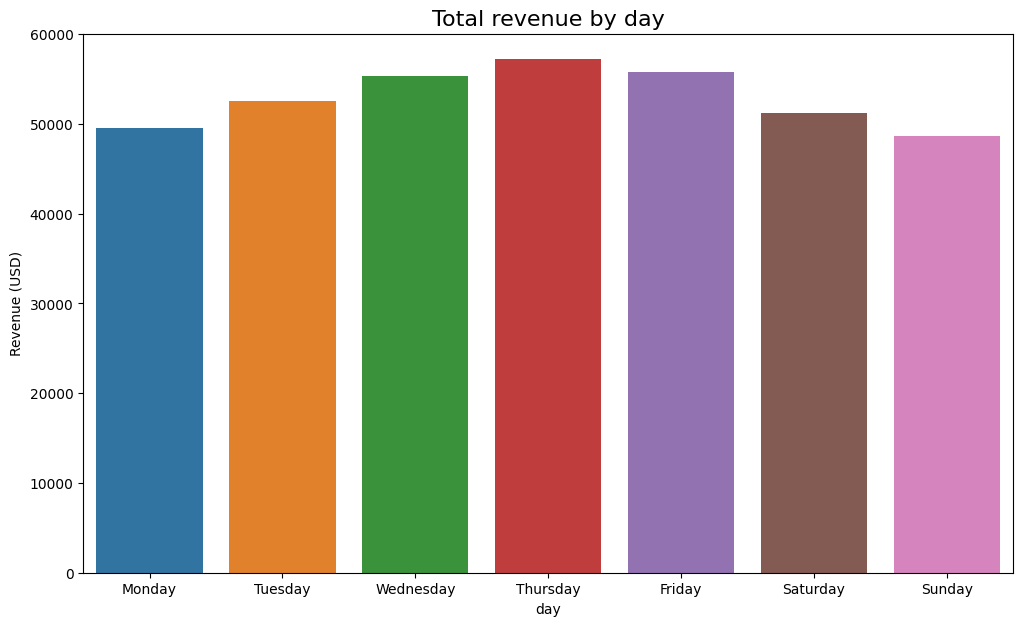

In [23]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);


**Note:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

**Plot total revenue by month**

In [24]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the sum of numeric columns by month
total_amount_month = df.groupby('month')[numeric_cols].sum()

# Reindex to ensure all months are included
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
month,,,,,,,,,,,,,,
January,3109,3332,5656.20,2084,329368,322659,2651,25287.20,628.5,994.0,3574.85,637.50,598.5,31735.25
February,2737,2911,5009.69,1834,288824,285397,2315,23006.19,599.0,880.5,3422.28,489.02,530.1,28937.89
March,3171,3316,5907.93,2140,332704,332632,2740,26439.54,708.5,1018.0,3708.97,590.48,613.5,33085.89
April,3138,3233,5925.07,2196,332870,328181,2727,25536.20,662.5,1004.5,3594.32,602.72,604.5,32012.54
May,3117,3308,6065.43,2083,327583,320431,2697,26970.02,696.5,1003.5,3912.94,621.62,603.3,33828.58
June,3072,3270,5846.83,2056,317776,318320,2624,26452.75,682.5,974.0,3611.85,590.42,588.3,32920.52
July,2653,2896,4785.59,1752,271979,270245,2316,21363.30,582.5,843.0,2811.47,497.62,507.9,26617.64
August,2731,2897,5146.53,1779,276694,280849,2340,22283.01,591.0,859.0,2955.44,545.36,516.9,27759.56
September,2712,2818,5100.54,1801,279502,279703,2330,22562.00,564.5,863.5,3133.24,559.64,519.6,28206.38


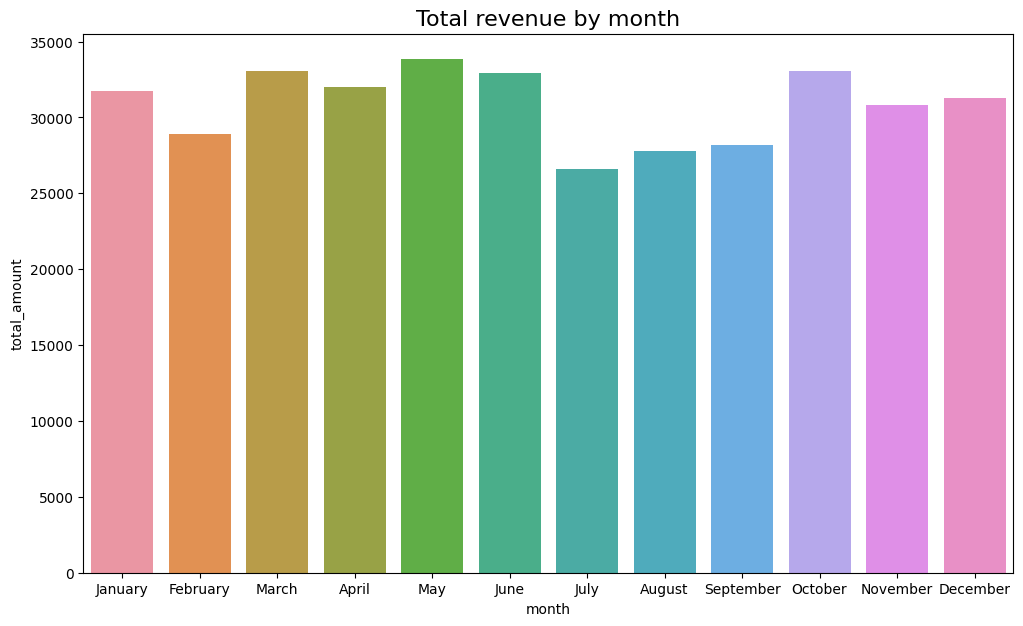

In [25]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

**Note:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Plot mean trip distance by drop-off location**

In [26]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [27]:
import pandas as pd

# Define a custom function to calculate the mean trip distance, ignoring non-numeric values
def mean_trip_distance(series):
    numeric_values = pd.to_numeric(series, errors='coerce')  # Convert values to numeric, coercing errors to NaN
    numeric_values = numeric_values.dropna()  # Drop NaN values
    return numeric_values.mean()  # Calculate mean of numeric values

# Apply the custom function to calculate the mean trip distance by DOLocationID
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].apply(mean_trip_distance)

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(ascending=True)
distance_by_dropoff


DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

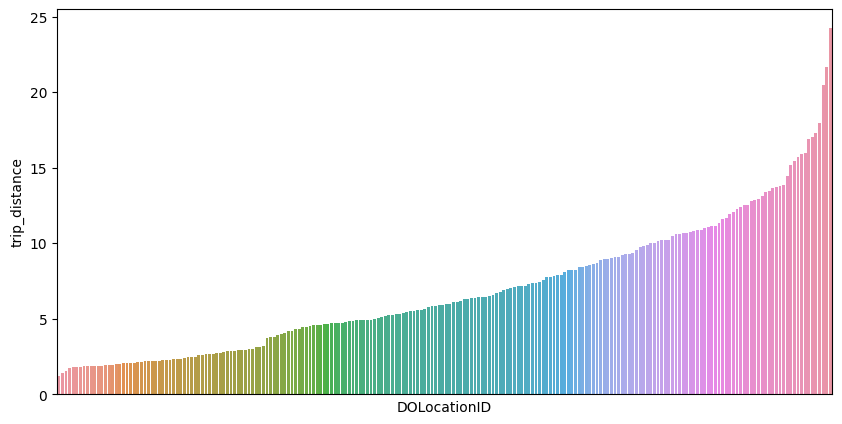

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(10,5))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff,
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.show()


**Note:** This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations. 

To confirm this conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

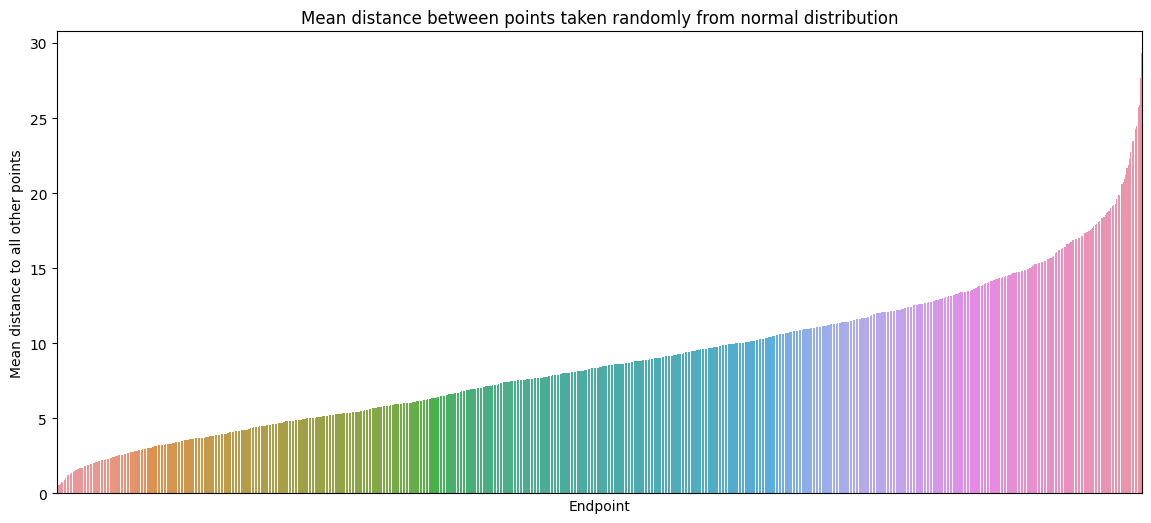

In [29]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

**Note:** The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does *not* mean that there was an even distrubtion of *rides* to each drop-off point. Examine this next.

**Histogram of rides by drop-off location**

In [30]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

**Note:** There are 49 numbers that do not represent a drop-off location. 

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

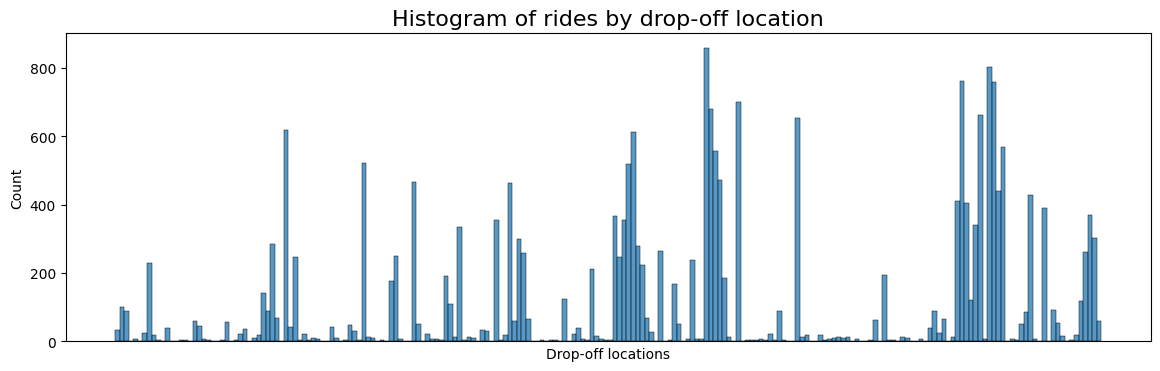

In [31]:
plt.figure(figsize=(14,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

**Note:** Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the PACE Strategy Document to reflect on the Execute stage.

I have learned .... the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values. 

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model? 

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model. 

visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

### Task 4b. Conclusion

EDA is important because ... 

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.* 

Visualizations helped me understand ..

* *That this dataset has some outliers that we will need to make decisions on prior to designing a model.*